In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
df = pd.read_csv('YahooF_Datas/cryptos/année_2021_Oct_DF.csv', index_col=0, parse_dates=[0])

In [23]:
serie = df['BTC-USD_Close']
serie.head(20)

Date
2021-09-28    41034.542969
2021-09-29    41564.363281
2021-09-30    43790.894531
2021-10-01    48116.941406
2021-10-02    47711.488281
2021-10-03    48199.953125
2021-10-04    49112.902344
2021-10-05    51514.812500
2021-10-06    55361.449219
2021-10-07    53805.984375
2021-10-08    53967.847656
2021-10-09    54968.222656
2021-10-10    54771.578125
2021-10-11    57484.789062
2021-10-12    56041.058594
2021-10-13    57401.097656
2021-10-14    57321.523438
2021-10-15    61593.949219
2021-10-16    60892.179688
2021-10-17    61553.617188
Name: BTC-USD_Close, dtype: float64

In [29]:
serie.shape
# 30 jours on va supprimer les 5 dernier et essayer de les prédires 

(30,)

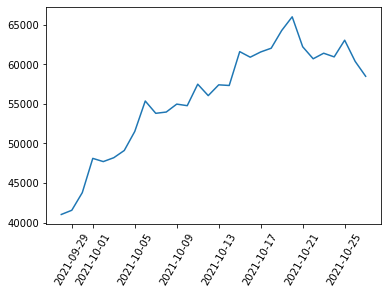

In [6]:
plt.plot(serie)
plt.xticks(rotation = 60);

In [7]:
serie_train = serie[:'2021-10-23']

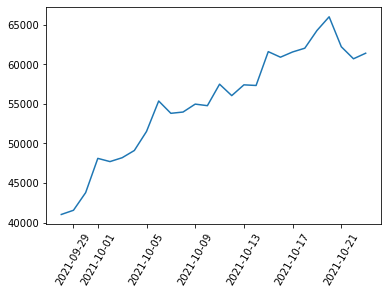

In [8]:
plt.plot(serie_train)
plt.xticks(rotation = 60);

Date
2021-09-28    0.998141
2021-09-29    1.027688
2021-09-30    0.984964
2021-10-01    1.019853
2021-10-02    0.997617
2021-10-03    0.981503
2021-10-04    0.990235
2021-10-05    0.998141
2021-10-06    1.027688
2021-10-07    0.984964
2021-10-08    1.019853
2021-10-09    0.997617
2021-10-10    0.981503
2021-10-11    0.990235
2021-10-12    0.998141
2021-10-13    1.027688
2021-10-14    0.984964
2021-10-15    1.019853
2021-10-16    0.997617
2021-10-17    0.981503
2021-10-18    0.990235
2021-10-19    0.998141
2021-10-20    1.027688
2021-10-21    0.984964
2021-10-22    1.019853
2021-10-23    0.997617
Name: seasonal, dtype: float64


(array([18899., 18901., 18905., 18909., 18913., 18917., 18921.]),
 [Text(18899.0, 0, '2021-09-29'),
  Text(18901.0, 0, '2021-10-01'),
  Text(18905.0, 0, '2021-10-05'),
  Text(18909.0, 0, '2021-10-09'),
  Text(18913.0, 0, '2021-10-13'),
  Text(18917.0, 0, '2021-10-17'),
  Text(18921.0, 0, '2021-10-21')])

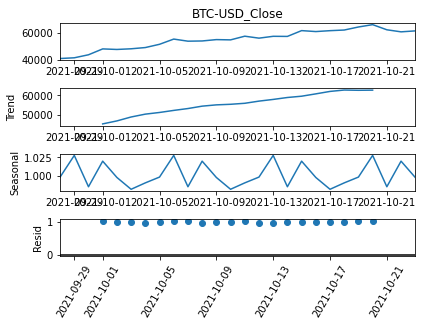

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
seas = seasonal_decompose(serie_train, model = "multiplicative")
print(seas.seasonal)
seas.plot()
plt.xticks(rotation = 60)
# Le residu est aléatoire et petit c'est une serie Additive

In [10]:
serie_train_log = np.log(serie_train)

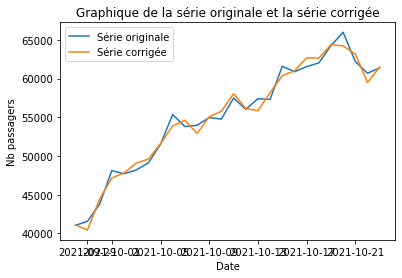

In [11]:
mult = seasonal_decompose(serie_train_log)

cvs=serie_train_log- mult.seasonal

x_cvs=np.exp(cvs)

plt.plot(serie_train, label='Série originale')

plt.plot(x_cvs, label='Série corrigée') 

plt.title('Graphique de la série originale et la série corrigée')

plt.xlabel('Date')

plt.ylabel('Nb passagers')

plt.legend()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

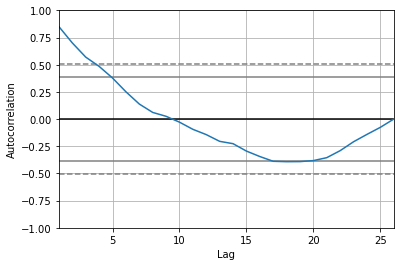

In [12]:
pd.plotting.autocorrelation_plot(serie_train_log)

In [13]:
serie_train_log_1 = serie_train_log.diff(1).dropna()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

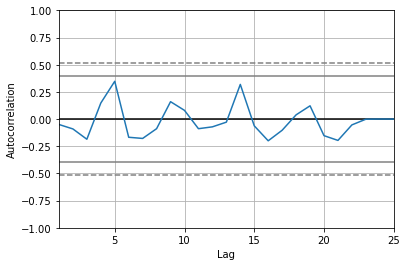

In [14]:
pd.plotting.autocorrelation_plot(serie_train_log_1)

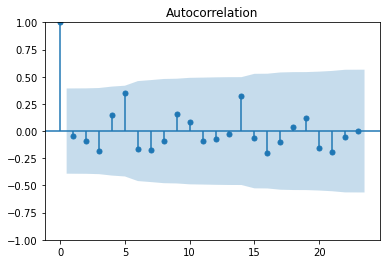

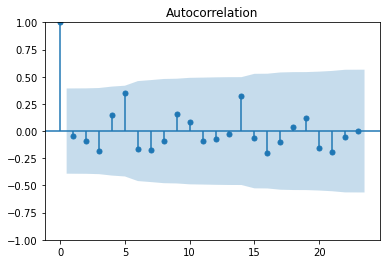

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(serie_train_log_1, lags = 23)


In [55]:
import statsmodels.api as sm
model = sm.tsa.SARIMAX(serie_train_log, order = (1, 1, 0), seasonal_order=(0, 1, 0, 5))
sarima = model.fit()
print(sarima.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.53876D+00    |proj g|=  1.12093D+00

At iterate    5    f= -1.53923D+00    |proj g|=  5.15421D-02

At iterate   10    f= -1.53929D+00    |proj g|=  1.43735D-03
  ys=-3.309E-07  -gs= 5.688E-08 BFGS update SKIPPED

At iterate   15    f= -1.53929D+00    |proj g|=  1.23390D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     38      1     1     0   1.234D-03  -1.539D+00
  F =  -1.5392856412870239     

CONVERGENCE: REL_

/Users/pierresarzier/machinelearning/MLenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/pierresarzier/machinelearning/MLenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


In [56]:
pred = np.exp(sarima.predict(serie_train.shape[0], serie.shape[0]))
print(pred)
serie_pred = pd.concat([serie_train, pred])
serie_pred.shape

2021-10-24    63547.021915
2021-10-25    65273.587550
2021-10-26    61528.699427
2021-10-27    60028.243558
2021-10-28    60721.718408
Freq: D, Name: predicted_mean, dtype: float64


(31,)

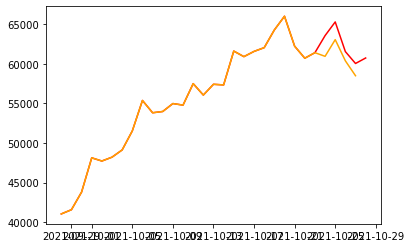

In [57]:
plt.plot(serie_pred, color = 'red')
plt.plot(serie, color = 'orange')